# 10.1 从生物神经元到人工神经元

## 10.1.1 生物神经元

![生物神经元](https://bkimg.cdn.bcebos.com/pic/d4628535e5dde711d0294ad5aaefce1b9d16611d?x-bce-process=image/watermark,image_d2F0ZXIvYmFpa2U5Mg==,g_7,xp_5,yp_5/format,f_auto)

## 10.1.2 神经元的逻辑运算

AND OR NOT

## 10.1.3 感知机

称为阈值逻辑单元(TLU)  
TLU计算其输入的加权和($z=w{_1}x{_1}+w{_2}x{_2}+...+w{_n}x{_n}=x^Tw$)

计算全连接层的输出  
$$h{_{X,b}}(X)=\phi(XW+b)$$
* $X$代表输入特征的矩阵
* $W$为权重矩阵
* $b$偏置向量
* $\phi$为激活函数

Scikit-Learn提供的Perceptron类

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]     # petal length, petal width
y = (iris.target == 0).astype(np.int0)  # iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
y_pred

array([0], dtype=int64)

## 10.1.4 多层感知机和反向传播

## 10.1.5 回归MLP

## 10.1.6 分类MLP

# 10.2 使用Keras实现MLP

## 10.2.1 TensorFlow 2

## 10.2.2 使用顺序API构建图像分类器

**Keras加载Fashion MNIST数据集**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


与使用Scikit-Learn加载数据集的区别：  
* 每个图像都表示为28×28阵列，而不是尺寸为78的一维阵列
* 像素强度表示为整数(0-255)，而不是浮点数(0.0-255.0)

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

创建验证集，并缩放输入特征: /255

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

要处理的内容

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
y_train[0]

4

In [11]:
class_names[y_train[0]]

'Coat'

**使用顺序API创建模型**

具有两个隐藏层的分类MLP

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

* 第一行创建一个sequential模型，这是用于神经网络的最简单的keras模型。它仅由顺序连接的单层堆栈组成，这称为顺序API。  
<br>
* 接下来，我们构建第一层并将其添加到模型中。它是flatten层，其作用是将每个输入图像转化为1维数组。如果接收到输入数据X，则计算X.rehape(-1, 1)。该层没有任何参数。它只是在那做一些简单的预处理，由于它是模型的第一层，因此应指定input_shape，其中不包括批处理大小，而仅包括实例的形状。或者你可以添加karas.layers.InputLayer作为第一层，设置input_shape=[28, 28]。  
<br>
* 接下来，我们添加具有300个神经元的Dense隐藏层。它使用ReLU激活函数。每个Dense层管理自己的权重矩阵。其中包含神经元及其输入之间的所有连接权重。它还管理偏置项的一个向量(每个神经元一个)。当它接收到一些输入数据时，它计算公式$h{_{X,b}}(X)=\phi(XW+b)$  
<br>
* 然后，我们添加第2个有100个神经元的Dense隐藏层，还是使用ReLU激活函数。  
<br>
* 最后，我们添加一个包含10个神经元的Dense输出层(每个类一个)，使用softmax激活函数。因为这些类是排他的。

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 获取层列表
model.layers

In [16]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [17]:
# 访问层的所有参数
weights, bias = hidden1.get_weights()
weights

array([[-0.04622531, -0.05798481, -0.04800379, ..., -0.01693275,
         0.02282213, -0.0331088 ],
       [ 0.01192966, -0.02822369,  0.00932688, ...,  0.03729054,
         0.02234351,  0.0050165 ],
       [ 0.0088644 ,  0.04789377, -0.04528529, ...,  0.05202605,
        -0.05675943, -0.01896679],
       ...,
       [ 0.03341072,  0.03231406, -0.03574697, ...,  0.02550467,
        -0.04357045,  0.07248634],
       [-0.06407627, -0.06420089,  0.03858601, ..., -0.02897232,
         0.02442262, -0.02950637],
       [ 0.04561367, -0.01514252, -0.06750373, ...,  0.07060404,
         0.00120436,  0.01495762]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
bias.shape

(300,)

**编译模型**

指定损失函数和要用的优化器

In [21]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd", 
              metrics=["accuracy"])

**训练和评估模型**

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7282 - accuracy: 0.7590 - val_loss: 0.5389 - val_accuracy: 0.8190
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4930 - accuracy: 0.8276 - val_loss: 0.4504 - val_accuracy: 0.8408
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4468 - accuracy: 0.8426 - val_loss: 0.4339 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4179 - accuracy: 0.8520 - val_loss: 0.4027 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3979 - accuracy: 0.8592 - val_loss: 0.3908 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3820 - accuracy: 0.8645 - val_loss: 0.3716 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3678 - accuracy: 0.8709 - val_loss: 0.3795 - val_accuracy:

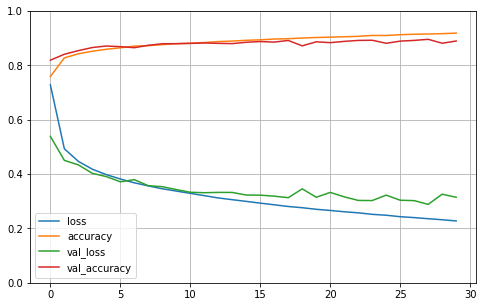

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 88.0639 - accuracy: 0.8167


[88.0638656616211, 0.8166999816894531]

**使用模型进行预测**

In [33]:
# 使用测试集的前三个实例

X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba
# y_proba.round(2)

1/1 [==============================] - 0s 43ms/step


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.463292e-05, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 9.999454e-01, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [35]:
# y_pred = model.predict_classes(X_new)

predict_x=model.predict(X_new) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

1/1 [==============================] - 0s 36ms/step


array([9, 2, 1, 1, 6], dtype=int64)

In [36]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

分类正确

## 10.2.3 使用顺序API构建回归MLP

加州住房

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [3]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

使用回归MLP进行预测与分类任务非常相似  
主要区别在于输出层只有一个神经元(因为只预测一个单值)，并且不使用激活函数，而损失函数是均方误差

In [5]:
X_train.shape[1:]

(8,)

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

In [7]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [8]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9745 - val_loss: 2.4175
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5594 - val_loss: 0.4392
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4430 - val_loss: 0.4111
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4437 - val_loss: 0.3944
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4081 - val_loss: 0.3859
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3961 - val_loss: 0.3831
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3906 - val_loss: 0.3863
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3861 - val_loss: 0.3755
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3801 - val_loss: 0.3663
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3754 - val_loss: 0.3622

In [10]:
y_pred

array([[1.6322358],
       [3.0553439],
       [4.306468 ]], dtype=float32)